In [132]:
library(monocle3)
library(Seurat)
library(dplyr)
library(biomaRt)
library(stringr)
library(SCORPIUS)
library(ggplot2)
library(cowplot)
library(RColorBrewer)
library(viridis)

In [2]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"

In [ ]:
f = paste(out, "obj.integrated.frazer.melton", sep = "")
load(f, verbose = T)

# Identify distinct cell population clusters in the Frazer + Melton integrated data

In [ ]:
Idents(integrated) <- "integrated_snn_res.0.05"

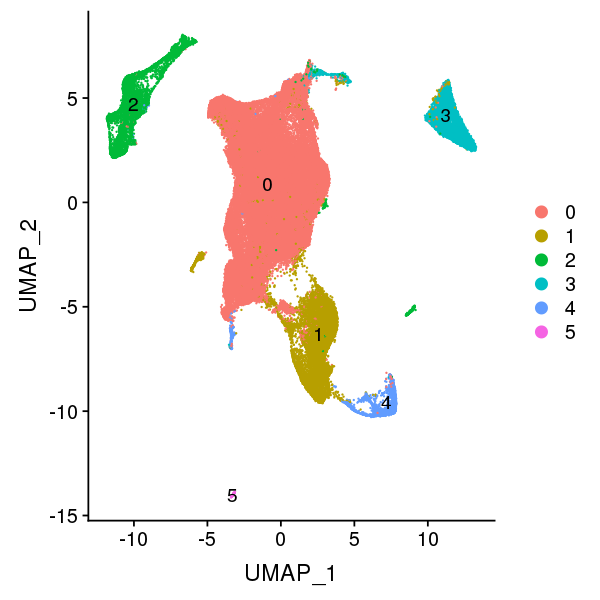

In [9]:
options(repr.plot.width = 5, repr.plot.height = 5)
DimPlot(integrated, group.by = "integrated_snn_res.0.05", label = T)

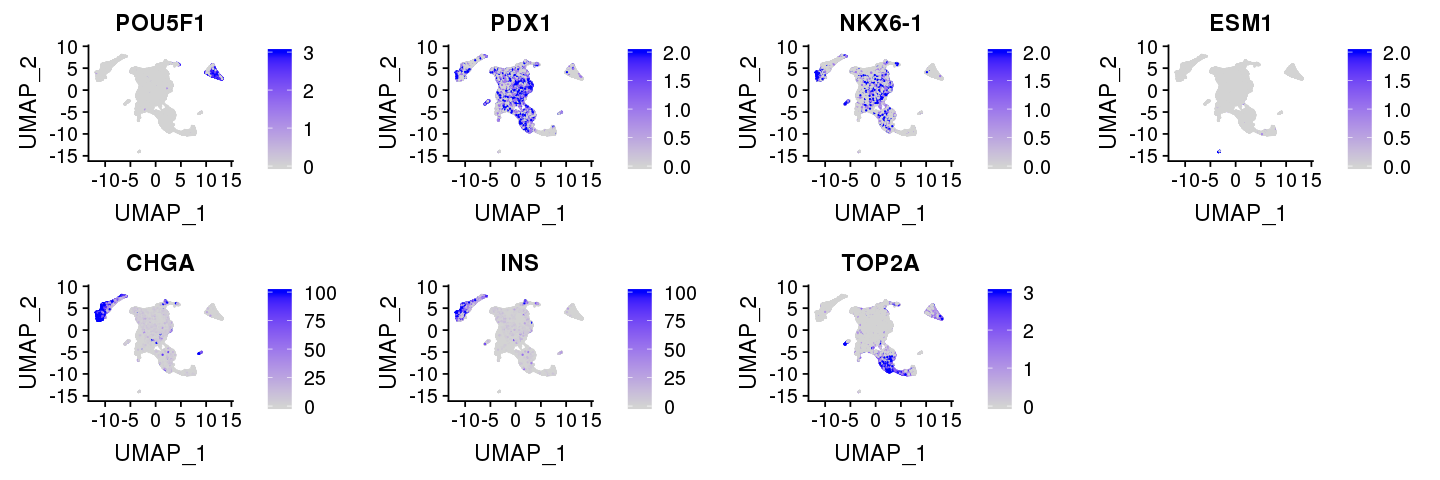

In [10]:
options(repr.plot.width = 12, repr.plot.height = 4)
FeaturePlot(integrated,
            c("POU5F1", "PDX1", "NKX6-1", "ESM1", "CHGA", "INS", "TOP2A"),
            max.cutoff = c(3, 2, 2, 2, 100, 100, 3), 
            ncol = 4)

## Conclusions:

Based on marker gene expression, I think the cell populations are: 

0 = PPCs

1 = Replicating cells

2 = Endocrine cells

3 = iPSC

4 = UNKNOWN 

5 = Endothelial

# Examine overlap of Melton cells with Frazer cells

In [11]:
integrated@meta.data$study = "Frazer"
integrated@meta.data[integrated@meta.data$orig.ident == "x1", ]$study = "Melton"

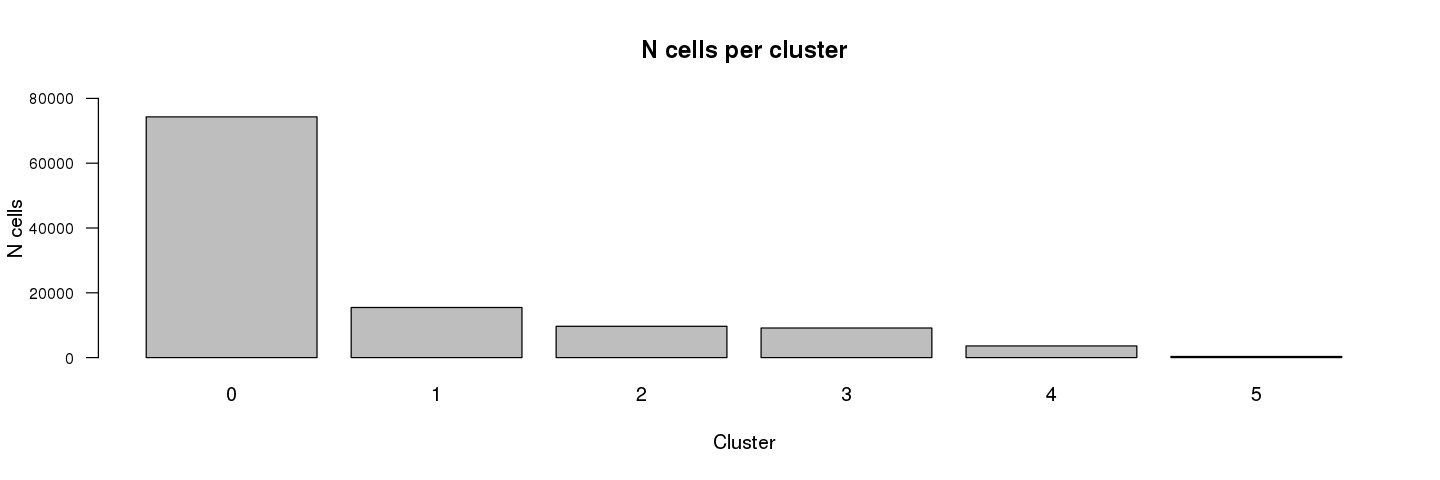

In [12]:
barplot(table(integrated@meta.data$integrated_snn_res.0.05), las = 1,
        main = "N cells per cluster", xlab = "Cluster", ylab = "N cells", ylim = c(0, 80000), cex.axis = .8)

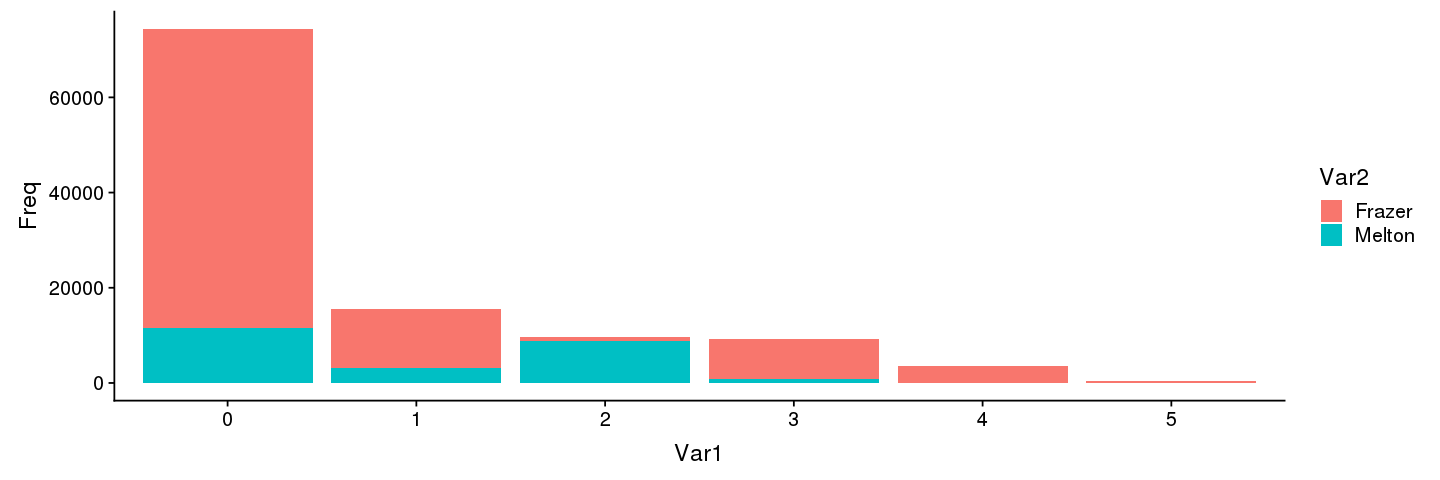

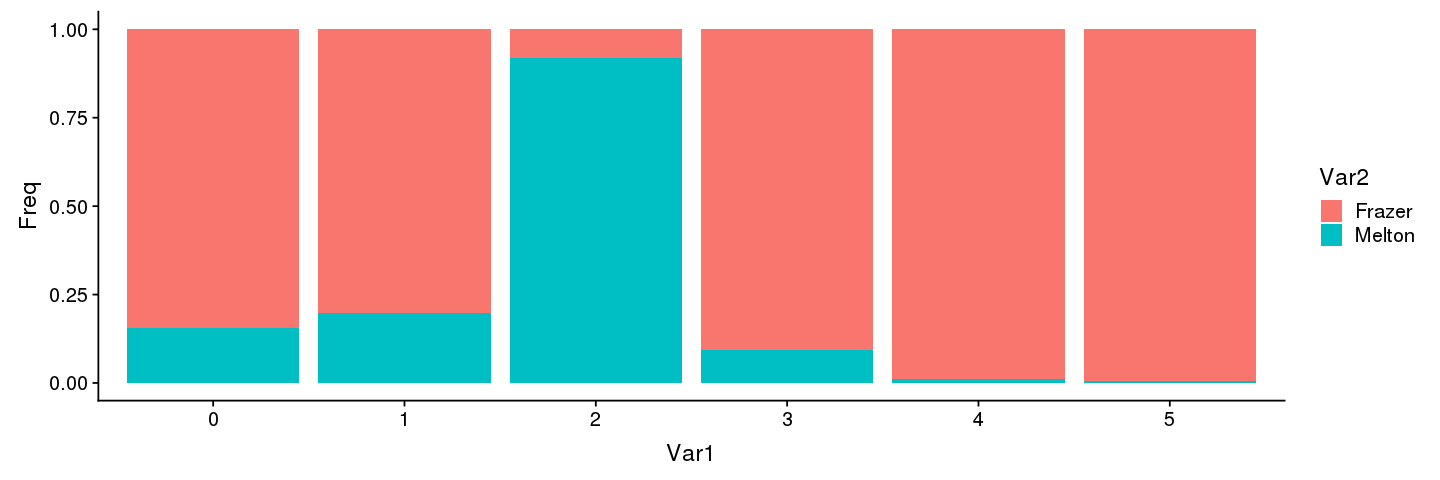

In [13]:
data = as.data.frame(table(integrated@meta.data$integrated_snn_res.0.05, integrated@meta.data$study))

ggplot(data, aes(fill=Var2, y=Freq, x=Var1)) + 
    geom_bar(position="stack", stat="identity")

ggplot(data, aes(fill=Var2, y=Freq, x=Var1)) + 
    geom_bar(position="fill", stat="identity")

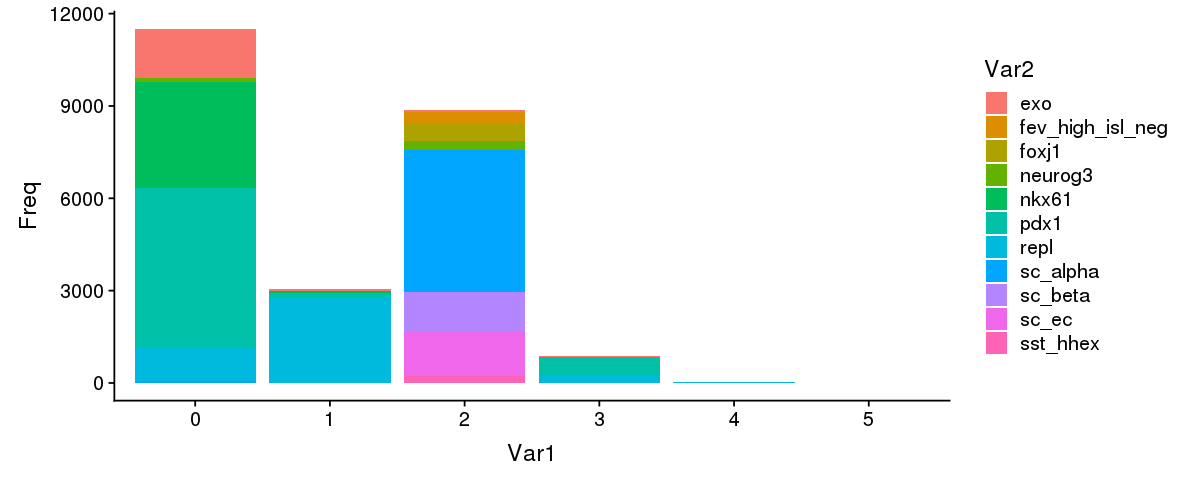

In [14]:
data = as.data.frame(table(integrated@meta.data$integrated_snn_res.0.05, integrated@meta.data$Assigned_cluster))

options(repr.plot.width = 10, repr.plot.height = 4)

ggplot(data, aes(fill=Var2, y=Freq, x=Var1)) + 
    geom_bar(position="stack", stat="identity")



## Conclusions:

Melton cells seem to predominantly overlap Frazer cells in clusters 0, 1, 2, and 3. Clusters 4 and 5 seems to be unique to the Frazer differentiations

# Calculate significantly overexpressed (i.e. marker) genes for each cluster (0 - 5)

In [70]:
integrated_0_markers <- FindMarkers(integrated, ident.1 = 0, ident.2 = NULL, min.diff.pct = 0.25)
write.table(integrated_0_markers, file = paste(out, "integrated_0_markers.txt", sep = ""))

In [512]:
head(integrated_0_markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SERPINA1,0,80.334796,0.712,0.409,0
SPINK1,0,43.334886,0.873,0.475,0
FN1,0,21.315796,0.908,0.556,0
ANXA2,0,16.333013,0.826,0.555,0
CCND1,0,4.738981,0.761,0.491,0
CDH6,0,2.898074,0.698,0.330,0


In [76]:
integrated_1_markers <- FindMarkers(integrated, ident.1 = 1, ident.2 = NULL, min.diff.pct = 0.25)
write.table(integrated_1_markers, file = paste(out, "integrated_1_markers.txt", sep = ""))

In [369]:
head(integrated_1_markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMGB2,0,21.50344,0.840,0.231,0
ARL6IP1,0,14.01840,0.847,0.569,0
PCNA,0,12.64855,0.574,0.215,0
TOP2A,0,12.39278,0.737,0.111,0
TPX2,0,11.98887,0.606,0.111,0
UBE2C,0,11.14343,0.618,0.100,0


In [77]:
integrated_2_markers <- FindMarkers(integrated, ident.1 = 2, ident.2 = NULL, min.diff.pct = 0.25)
write.table(integrated_2_markers, file = paste(out, "integrated_2_markers.txt", sep = ""))

In [513]:
head(integrated_2_markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SST,0,Inf,0.705,0.050,0
INS,0,Inf,0.848,0.037,0
CHGA,0,Inf,0.989,0.094,0
PPY,0,Inf,0.359,0.005,0
PYY,0,Inf,0.505,0.011,0
TTR,0,Inf,0.900,0.394,0


In [78]:
integrated_3_markers <- FindMarkers(integrated, ident.1 = 3, ident.2 = NULL, min.diff.pct = 0.25)
write.table(integrated_3_markers, file = paste(out, "integrated_3_markers.txt", sep = ""))

In [514]:
head(integrated_3_markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
POU5F1,0,2.692025,0.878,0.002,0
MIR302B,0,2.217870,0.840,0.000,0
L1TD1,0,2.141682,0.866,0.158,0
TDGF1,0,1.800125,0.780,0.010,0
TERF1,0,1.788620,0.867,0.261,0
ESRG,0,1.733626,0.755,0.000,0


In [79]:
integrated_4_markers <- FindMarkers(integrated, ident.1 = 4, ident.2 = NULL, min.diff.pct = 0.25)
write.table(integrated_4_markers, file = paste(out, "integrated_4_markers.txt", sep = ""))

In [806]:
head(integrated_4_markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
COL3A1,0,35.585060,0.268,0.008,0
ANXA1,0,23.001336,0.543,0.046,0
ARHGAP29,0,8.728584,0.558,0.193,0
COL1A1,0,8.310855,0.517,0.190,0
CRABP2,0,7.604973,0.867,0.316,0
NR2F2,0,5.948574,0.708,0.320,0


In [ ]:
integrated_5_markers <- FindMarkers(integrated, ident.1 = 5, ident.2 = NULL, min.diff.pct = 0.25)
write.table(integrated_5_markers, file = paste(out, "integrated_5_markers.txt", sep = ""))

In [516]:
head(integrated_5_markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ESM1,0,3.839787,0.977,0.003,0
PLVAP,0,2.599798,0.917,0.001,0
GNG11,0,2.540356,0.923,0.015,0
COL4A1,0,2.343674,0.963,0.190,0
CD93,0,2.337619,0.906,0.001,0
IGFBP4,0,2.180475,0.917,0.103,0


### Conclusions:

Marker gene expression supports cluster 1 as replicating cells (TOP2A), cluster 2 as endocrine cells (INS, CHGA, PPY, etc.), cluster 3 as iPSC (POU5F1), and cluster 5 as endothelial (ESM1, PLVAP). 

Marker gene expression is less clear for clusters 0 and 4.

# Extract cells from individual clusters and annotate using Melton cell types

## Cluster 2

In [15]:
integrated.C2 =  subset(integrated, idents = 2)
integrated.C2 <- FindNeighbors(integrated.C2, dims = 1:15)
integrated.C2 <- FindClusters(integrated.C2, resolution = 0.1)
integrated.C2 <- RunUMAP(integrated.C2, dims = 1:15, min.dist = 0.1)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9664
Number of edges: 336028

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9496
Number of communities: 6
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”14:48:35 Read 9664 rows and found 15 numeric columns
14:48:35 Using Annoy for neighbor search, n_neighbors = 30
14:48:35 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
14:48:38 Writing NN index file to temp file /tmp/5936840.1.juphigh.q/RtmpbvDf6A/file38d27ea40690
14:48:38 Searching Annoy index using 1 thread, search_k = 3000
14:48:41 Annoy recall = 100%
14:48:42 Commencing smooth kNN distance calibration using 1 thread
14:48:43 Initializing from normalized Laplacian + noise
14:48:44 Commencing optimization for 500 epochs, with 401692 positi

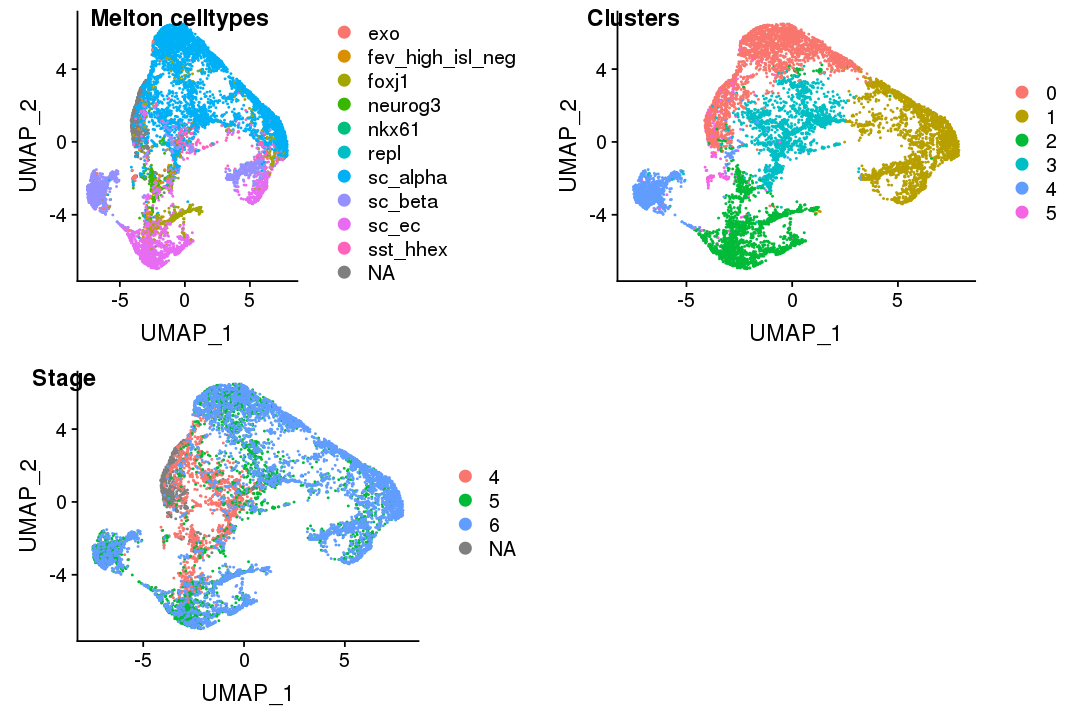

In [16]:
options(repr.plot.width = 9, repr.plot.height = 6)
p1 <- DimPlot(integrated.C2, group.by = "Assigned_cluster", reduction = "umap", ncol = 2)
p2 <- DimPlot(integrated.C2, reduction = "umap")
p3 <- DimPlot(integrated.C2, group.by = "Stage", reduction = "umap", ncol = 2)
plot_grid(p1, p2, p3, labels=c('Melton celltypes', 'Clusters', 'Stage'))

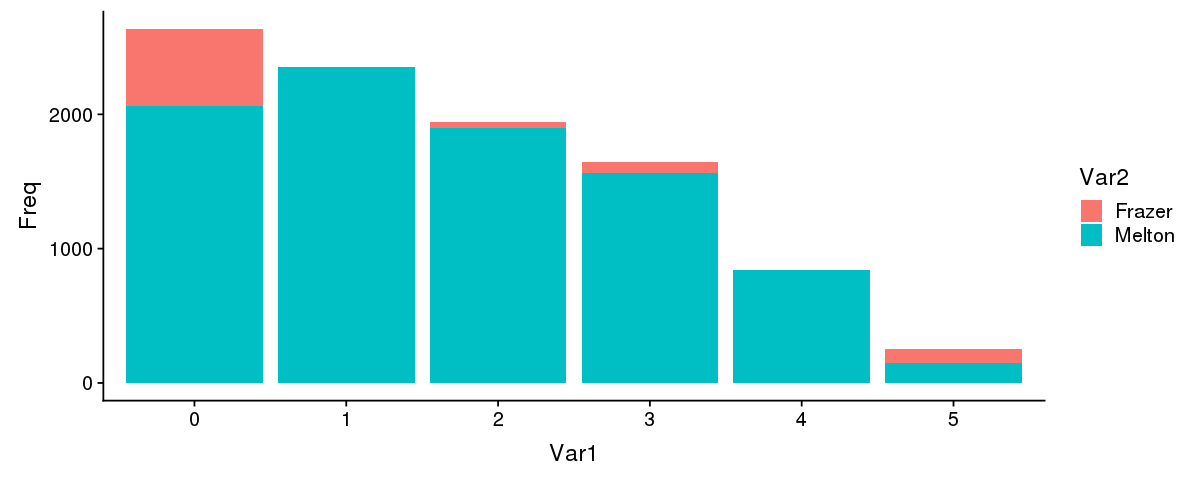

In [19]:
data = as.data.frame(table(integrated.C2@meta.data$RNA_snn_res.0.1, integrated.C2@meta.data$study))

ggplot(data, aes(fill=Var2, y=Freq, x=Var1)) + 
    geom_bar(position="stack", stat="identity")


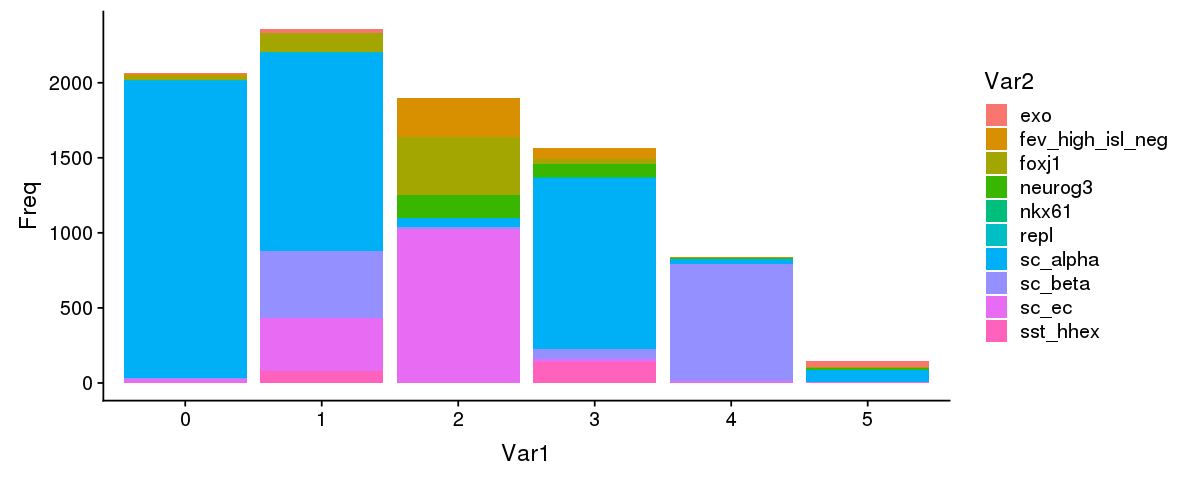

In [18]:
data = as.data.frame(table(integrated.C2@meta.data$RNA_snn_res.0.1, integrated.C2@meta.data$Assigned_cluster))

options(repr.plot.width = 10, repr.plot.height = 4)

ggplot(data, aes(fill=Var2, y=Freq, x=Var1)) + geom_bar(position="stack", stat="identity")

### Conclusion:

Frazer cells predominantly lie in clusters 0 and 5 of the Endocrine cell population (Cluster 2). These cells are mostly Melton-annotated Alpha cells.

Cluster 2 Frazer major cell population: Endocrine

Cluster 2 Frazer minor cell population: Alpha cells


In [165]:
save(integrated.C2, file = paste(out, "obj.integrated.frazer.melton_cluster2_seurat_obj", sep = ""))

## Cluster 0

In [20]:
integrated.C0_test =  subset(integrated, idents = 0)
integrated.C0_test <- FindNeighbors(integrated.C0_test, dims = 1:15)
integrated.C0_test <- FindClusters(integrated.C0_test, resolution = 0.3)
integrated.C0_test <- RunUMAP(integrated.C0_test, dims = 1:15, min.dist = 0.1)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 74303
Number of edges: 2206318

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8905
Number of communities: 9
Elapsed time: 37 seconds


14:52:49 Read 74303 rows and found 15 numeric columns
14:52:49 Using Annoy for neighbor search, n_neighbors = 30
14:52:49 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
14:53:06 Writing NN index file to temp file /tmp/5936840.1.juphigh.q/RtmpbvDf6A/file38d29ddf309
14:53:06 Searching Annoy index using 1 thread, search_k = 3000
14:53:39 Annoy recall = 100%
14:53:40 Commencing smooth kNN distance calibration using 1 thread
14:53:57 Initializing from normalized Laplacian + noise
14:54:13 Commencing optimization for 200 epochs, with 3300656 positive edges
14:55:56 Optimization finished


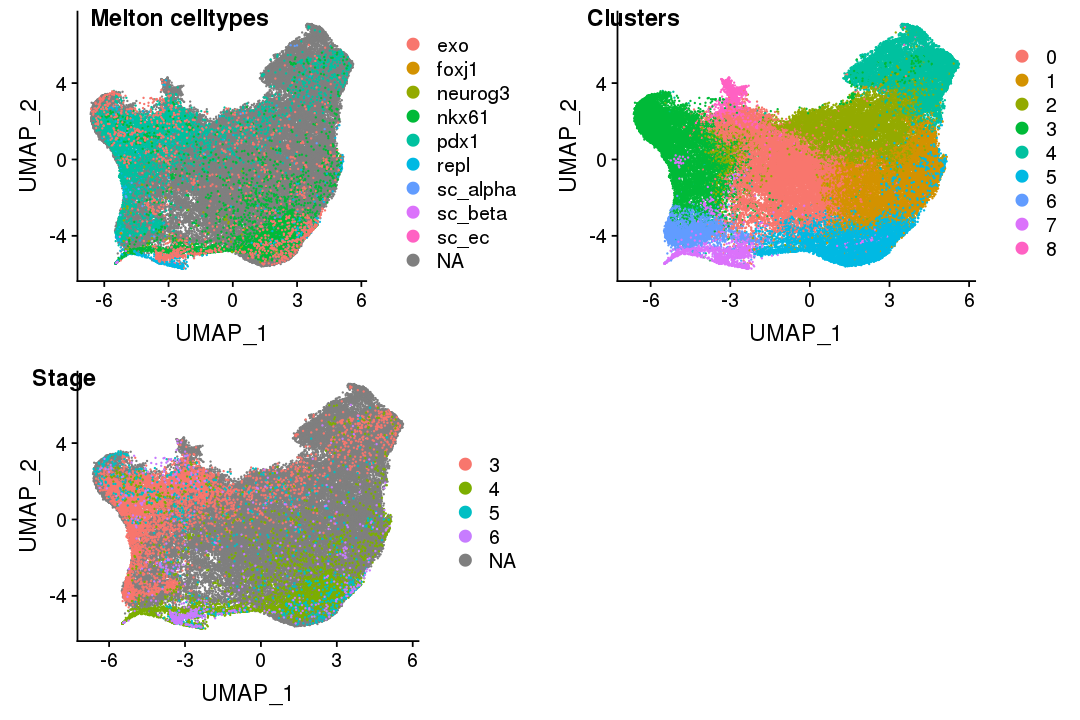

In [21]:
options(repr.plot.width = 9, repr.plot.height = 6)
p1 <- DimPlot(integrated.C0_test, group.by = "Assigned_cluster", reduction = "umap", ncol = 2)
p2 <- DimPlot(integrated.C0_test, reduction = "umap")
p3 <- DimPlot(integrated.C0_test, group.by = "Stage", reduction = "umap", ncol = 2)
plot_grid(p1, p2, p3, labels=c('Melton celltypes', 'Clusters', 'Stage'))

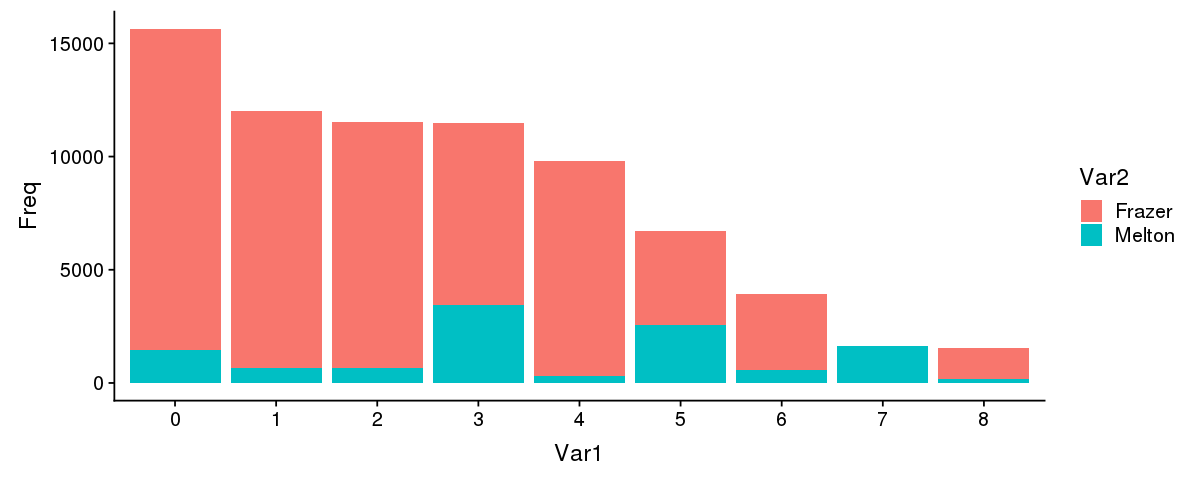

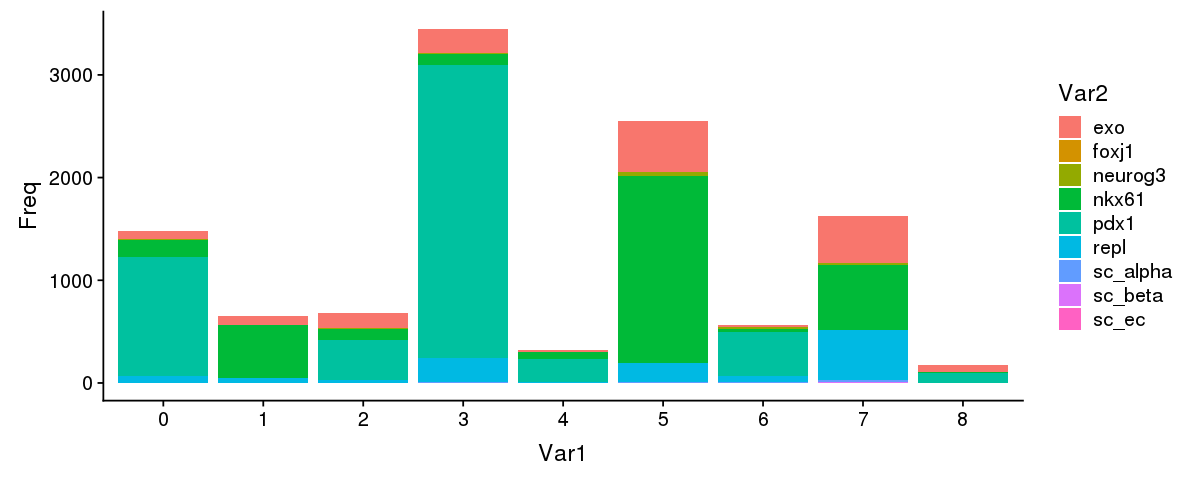

In [24]:
options(repr.plot.width = 10, repr.plot.height = 4)

data = as.data.frame(table(integrated.C0_test@meta.data$RNA_snn_res.0.3, integrated.C0_test@meta.data$study))

ggplot(data, aes(fill=Var2, y=Freq, x=Var1)) + 
    geom_bar(position="stack", stat="identity")

data = as.data.frame(table(integrated.C0_test@meta.data$RNA_snn_res.0.3, integrated.C0_test@meta.data$Assigned_cluster))

ggplot(data, aes(fill=Var2, y=Freq, x=Var1)) + geom_bar(position="stack", stat="identity")


In [23]:
table(integrated.C0_test@meta.data[integrated.C0_test@meta.data$RNA_snn_res.0.3 == 7, "study"])


Frazer Melton 
    13   1623 

### observations
Clusters 0, 2, 3, and 6 seem to dominantly defined by Melton-annotated PDX1 progenitor cells

Cluster 1 and 5 seem to dominantly defined by Melton-annotated NKX6-1 progenitor cells

Clusters 4 and 8 is not well represented in Melton cell types, but dominantly PDX1 progenitor cells

Cluster 7 is ambigous cell types, but dominantly Melton cell types (99%; 1623 / 1636)

In [568]:
integrated.C0_test_4 <- FindMarkers(integrated.C0_test, ident.1 = 4, ident.2 = NULL, min.diff.pct = 0.25)

In [577]:
head(integrated.C0_test_4, 15)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TAGLN,0,78.866409,0.842,0.308,0
CXCL1,0,65.512776,0.358,0.097,0
NPPB,0,18.295889,0.480,0.117,0
FLNA,0,12.067687,0.844,0.570,0
VCL,0,11.609422,0.671,0.382,0
AHNAK,0,8.019224,0.590,0.322,0
MYH9,0,7.338992,0.875,0.556,0
ACTN1,0,7.273914,0.702,0.367,0
MSMO1,0,6.180338,0.575,0.286,0


In [572]:
integrated.C0_test_8 <- FindMarkers(integrated.C0_test, ident.1 = 8, ident.2 = NULL, min.diff.pct = 0.25)

In [574]:
head(integrated.C0_test_8, 15) # liver progenitor cell???

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
APOA2,0,44.3652517,0.690,0.207,0
AFP,0,41.5234822,0.671,0.237,0
LGALS3,0,15.8303035,0.857,0.242,0
HLA-DPB1,0,13.2827282,0.379,0.091,0
APOC1,0,9.0614010,0.902,0.384,0
NDRG1,0,2.3211605,0.424,0.068,0
S100A14,0,1.9123902,0.432,0.098,0
PITX2,0,1.4365364,0.330,0.022,0
LCN15,0,1.4317835,0.311,0.027,0


### Conclusions:

Clusters 0, 2, 3, and 6 seem to dominantly defined by Melton-annotated PDX1 progenitor cells

Cluster 1 and 5 seem to dominantly defined by Melton-annotated NKX6-1 progenitor cells

Cluster 7 is ambigous cell types, but dominantly Melton cell types (99%; 1623 / 1636)

Cluster 4 is not well represented in Melton cell types, but dominantly PDX1 progenitor cells. Marker genes do not reflect entire cluster. 

Cluster 8, based on gene expression, may be a liver progenitor cell (lpc) (based on AFP and APOA2 expression)

In [639]:
integrated.C0_anns = integrated.C0_test@meta.data
integrated.C0_anns = integrated.C0_anns[, c("RNA_snn_res.0.3", "study", "Assigned_cluster")]
integrated.C0_anns$major_cell_population <- integrated.C0_anns$Assigned_cluster
integrated.C0_anns$minor_cell_population <- integrated.C0_anns$Assigned_cluster

for( cluster in unique(integrated.C0_anns$RNA_snn_res.0.3)){
    
    x = as.data.frame(table(integrated.C0_anns[ integrated.C0_anns$RNA_snn_res.0.3 == cluster & integrated.C0_anns$study == "Melton", "Assigned_cluster"]))
    x$fraction = (x$Freq/sum(x$Freq)) * 100
    major = as.character(x[x$fraction == max(x$fraction), "Var1"])
    minor = paste(x[x$fraction > 10, "Var1"], collapse = ", ")
    
    integrated.C0_anns[integrated.C0_anns$RNA_snn_res.0.3 == cluster & integrated.C0_anns$study == "Frazer", "major_cell_population"] = major
    integrated.C0_anns[integrated.C0_anns$RNA_snn_res.0.3 == cluster & integrated.C0_anns$study == "Frazer", "minor_cell_population"] = minor
   
}

integrated.C0_anns[integrated.C0_anns$RNA_snn_res.0.3 == 8 & integrated.C0_anns$study == "Frazer", "major_cell_population"] = "lpc"
integrated.C0_anns[integrated.C0_anns$RNA_snn_res.0.3 == 8 & integrated.C0_anns$study == "Frazer", "minor_cell_population"] = "lpc"

In [854]:
integrated.C0_test_metaORIG = integrated.C0_test@meta.data

In [869]:
integrated.C0_test@meta.data$major_cell_population_melton = integrated.C0_anns[match(rownames(integrated.C0_anns), rownames(integrated.C0_test@meta.data)), "major_cell_population"]

## Confirm time differences by binning cells by pseudotime

In [790]:
expression_matrix = integrated.C0_test@assays$RNA

In [793]:
cell_metadata = integrated.C0_test@meta.data
cell_metadata = cell_metadata[rownames(cell_metadata) %in% colnames(expression_matrix),]
cell_metadata$cell <- rownames(cell_metadata)
gene_annotation = data.frame(row.names = rownames(expression_matrix), id = rownames(expression_matrix), gene_short_name = rownames(expression_matrix))

In [794]:
cds <- new_cell_data_set(expression_matrix[, rownames(cell_metadata)],
                         cell_metadata = cell_metadata,
                         gene_metadata = gene_annotation)

In [796]:
cds@reducedDims$PCA = Embeddings(object = integrated.C0_test[["pca"]])
cds@reducedDims$UMAP = Embeddings(object = integrated.C0_test[["umap"]])
cds = cluster_cells(cds, reduction_method='UMAP')

In [797]:
## When you learn_graph(cds, use_partition=F) you cannot set root node to a partition > 1 (per https://github.com/cole-trapnell-lab/monocle-release/issues/280)
## set all partitions to 1 for workaround.
levels(cds@clusters$UMAP$partitions)

[1] "1"

In [798]:
cds = learn_graph(cds, use_partition=F)

  |======================================================================| 100%


In [819]:
# a helper function to identify the root principal points:
get_earliest_principal_node <- function(cds, cell_phenotype, root_type){

    cell_ids <- which(pData(cds)[, cell_phenotype] == root_type)


    closest_vertex <- cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
    closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])
    root_pr_nodes <- igraph::V(principal_graph(cds)[["UMAP"]])$name[as.numeric(names(which.max(table(closest_vertex[cell_ids,]))))]

    root_pr_nodes
}


In [1031]:
cds = order_cells(cds, root_pr_nodes = get_earliest_principal_node(cds, "Assigned_cluster", "pdx1"))
# cds = order_cells(cds, root_pr_nodes = get_earliest_principal_node(cds, "RNA_snn_res.0.3", "4"))

In [25]:
load(paste(out, "obj.integrated.frazer.melton_cluster0_pseudotime", sep = ""))

In [27]:
# bin time by quantiles
pseudotime_ppc = as.data.frame(pseudotime(cds))
colnames(pseudotime_ppc) = "pseudotime"
quants = as.data.frame(quantile(pseudotime_ppc$pseudotime))

In [28]:
pseudotime_ppc$quants = NA
pseudotime_ppc$pseudotime = as.numeric(pseudotime_ppc$pseudotime)

In [138]:
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[1, 1] & pseudotime_ppc$pseudotime <= quants[2, 1],  "quants" ] = "PPC_1"
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[2, 1] & pseudotime_ppc$pseudotime <= quants[3, 1],  "quants" ] = "PPC_2"
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[3, 1] & pseudotime_ppc$pseudotime <= quants[4, 1],  "quants" ] = "PPC_3"
pseudotime_ppc[pseudotime_ppc$pseudotime >= quants[4, 1] & pseudotime_ppc$pseudotime <= quants[5, 1],  "quants" ] = "PPC_4"

In [139]:
integrated.C0_test@meta.data$pseudotime_quantile = pseudotime_ppc[match(rownames(pseudotime_ppc), rownames(integrated.C0_test@meta.data)), "quants"]

In [140]:
integrated.C0_test@meta.data$pseudotime = pseudotime_ppc[match(rownames(pseudotime_ppc), rownames(integrated.C0_test@meta.data)), "pseudotime"]

In [141]:
PlotUMAPContinuous <- function(obj, annotate, lX, lY, text_width, n.col, plot_leg = FALSE, cols2use = NULL){

    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    umap = as.data.frame(Embeddings(obj[["umap"]]))
    umap$clusters = obj@meta.data[match(rownames(umap), rownames(obj@meta.data)), annotate]
    

#     rbPal <- colorRampPalette(c('red', "yellow", 'blue'))
    umap$color <- plasma(10)[as.numeric(cut(umap$clusters,breaks = 10))]
    

    
    plot(umap[, 1], umap[, 2],
         pch = 19, 
         xlab = "UMAP1",
         ylab = "UMAP2",
         col = umap$color,
         cex = .1,
         las = 1)

    if( plot_leg == TRUE){
        
        legend("topleft",legend=c(1:10),col =rbPal(10),pch=20)
        
    }
    
    
}

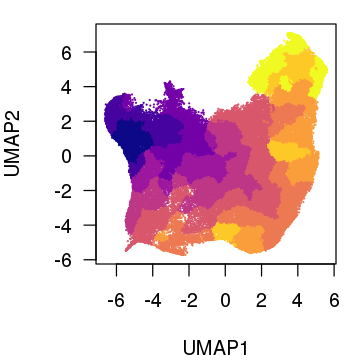

In [142]:
PlotUMAP(integrated.C0_test, "pseudotime", 7, 16, text_width = 2, n.col = 2)

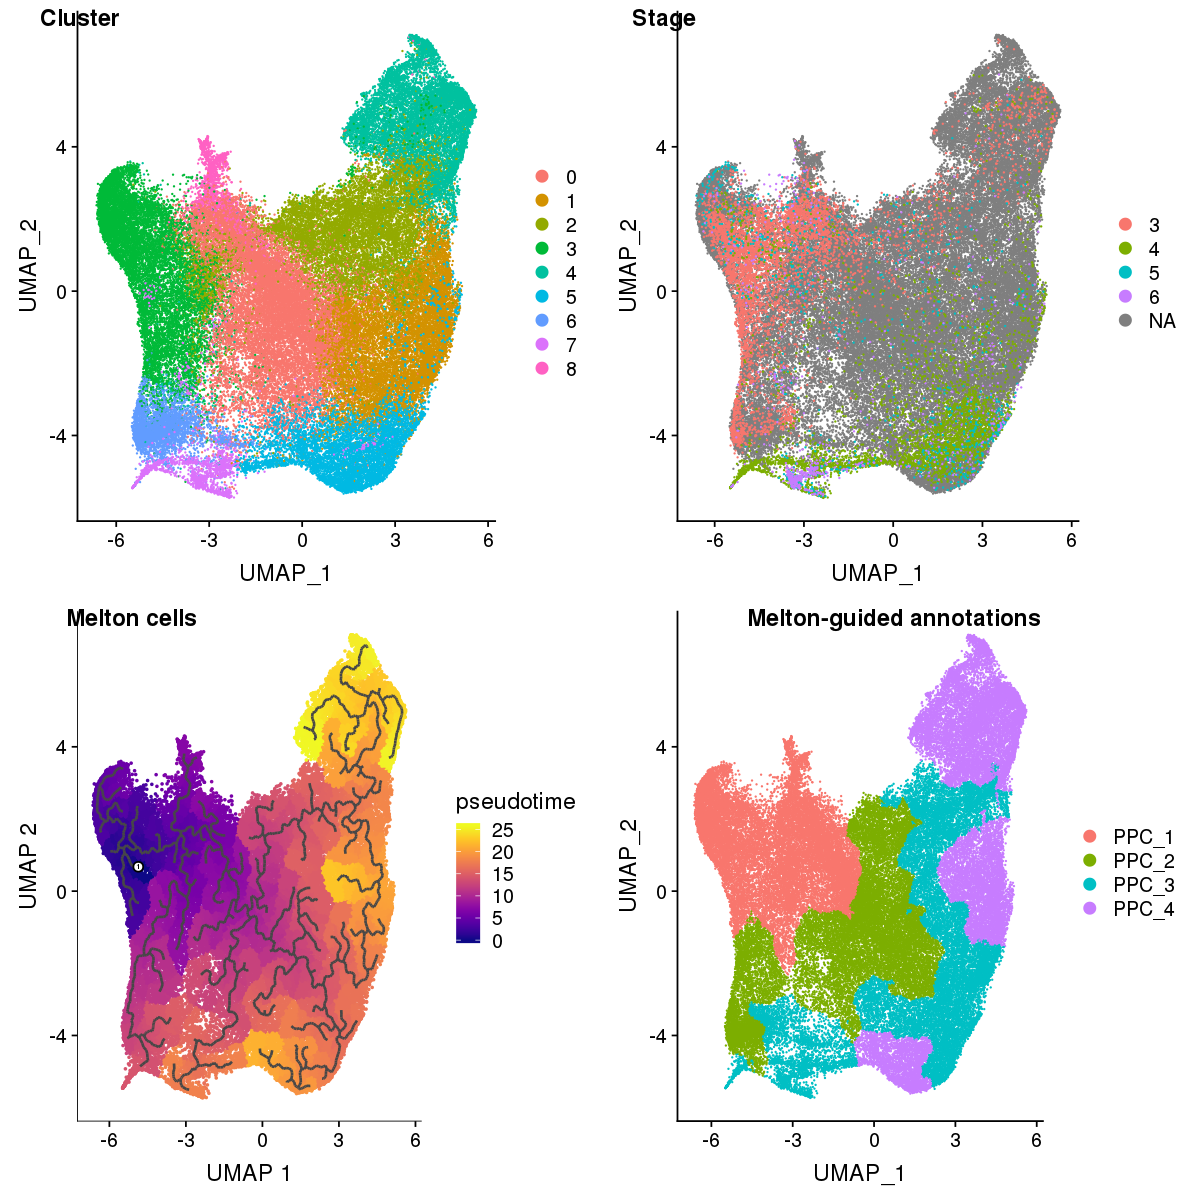

In [144]:
options(repr.plot.width = 10, repr.plot.height = 10)

p5 <- DimPlot(integrated.C0_test, reduction = "umap")
# p1 <- DimPlot(integrated.C0_test, group.by = "Stage", reduction = "umap", ncol = 2)
p3 <- DimPlot(integrated.C0_test, group.by = "Assigned_cluster", reduction = "umap", ncol = 2)
# p4 <- DimPlot(integrated.C0_test, group.by = "major_cell_population_melton", reduction = "umap", ncol = 2)
p2 <- plot_cells(cds, 
           color_cells_by = "pseudotime", 
           label_cell_groups=FALSE, 
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)

p6 <- DimPlot(integrated.C0_test, group.by = "pseudotime_quantile", reduction = "umap", ncol = 2)




plot_grid(p5, p1, p2, p6, labels=c("Cluster", 'Stage', "Melton cells", "Melton-guided annotations", 'Pseudotime', "Pseudotime binned"), ncol = 2)

In [1037]:
save(cds, file = paste(out, "obj.integrated.frazer.melton_cluster0_pseudotime", sep = ""))

In [145]:
save(integrated.C0_test, file = paste(out, "obj.integrated.frazer.melton_cluster0_seurat_obj", sep = ""))

## Cluster 1

In [146]:
integrated.C1 =  subset(integrated, idents = 1)
integrated.C1 <- FindNeighbors(integrated.C1, dims = 1:15)
integrated.C1 <- FindClusters(integrated.C1, resolution = 0.05)
integrated.C1 <- RunUMAP(integrated.C1, dims = 1:15, min.dist = 0.1)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15457
Number of edges: 512571

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9559
Number of communities: 2
Elapsed time: 2 seconds


15:44:46 Read 15457 rows and found 15 numeric columns
15:44:46 Using Annoy for neighbor search, n_neighbors = 30
15:44:46 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
15:44:49 Writing NN index file to temp file /tmp/5936840.1.juphigh.q/RtmpbvDf6A/file38d24653acd3
15:44:49 Searching Annoy index using 1 thread, search_k = 3000
15:44:55 Annoy recall = 100%
15:44:56 Commencing smooth kNN distance calibration using 1 thread
15:44:58 Initializing from normalized Laplacian + noise
15:44:58 Commencing optimization for 200 epochs, with 672226 positive edges
15:45:17 Optimization finished


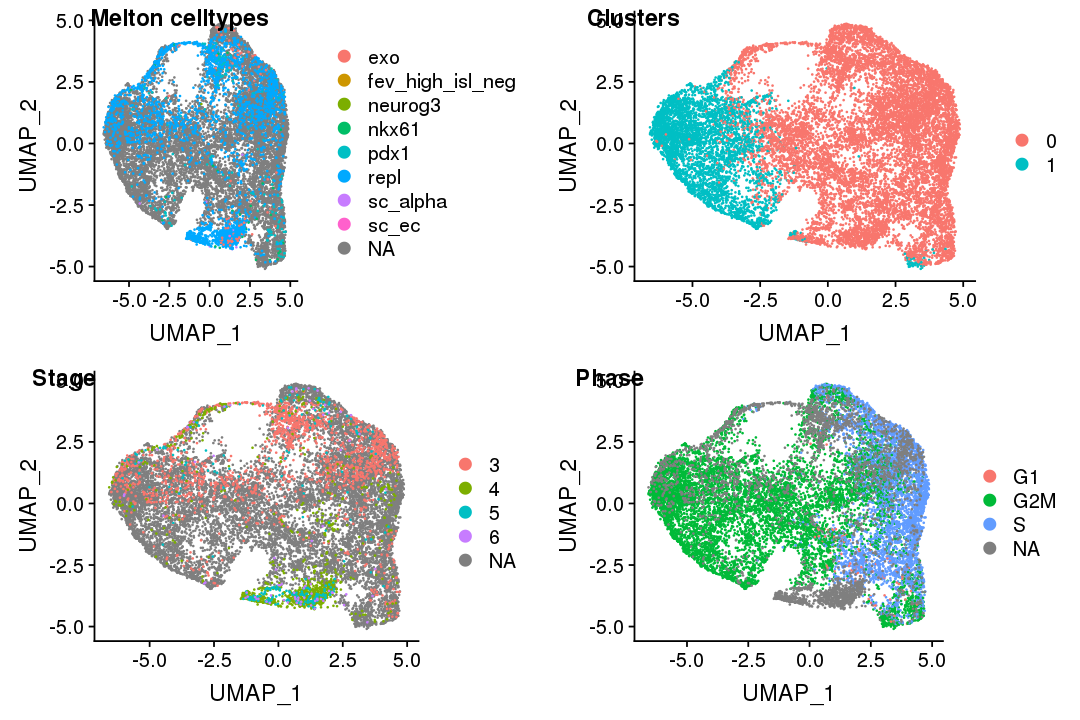

In [147]:
options(repr.plot.width = 9, repr.plot.height = 6)
p1 <- DimPlot(integrated.C1, group.by = "Assigned_cluster", reduction = "umap", ncol = 2)
p2 <- DimPlot(integrated.C1, reduction = "umap")
p3 <- DimPlot(integrated.C1, group.by = "Stage", reduction = "umap", ncol = 2)
p4 <- DimPlot(integrated.C1, group.by = "Phase", reduction = "umap", ncol = 2)
plot_grid(p1, p2, p3, p4, labels=c('Melton celltypes', 'Clusters', 'Stage', "Phase"))

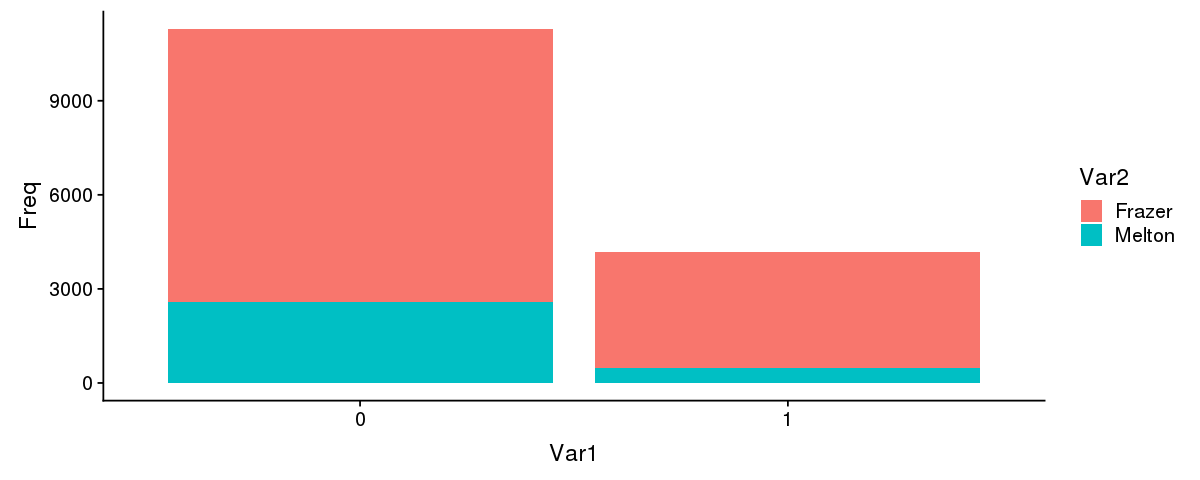

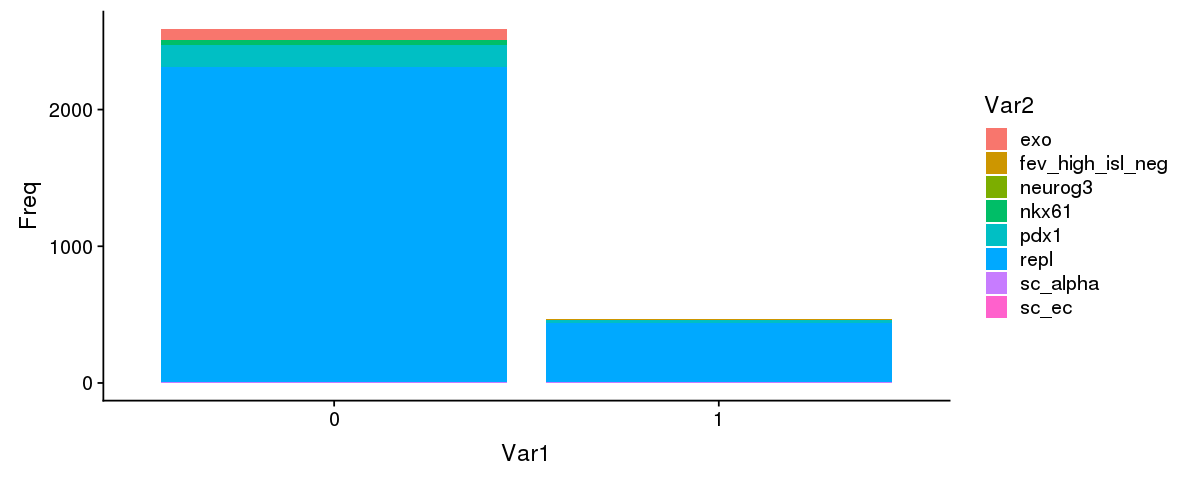

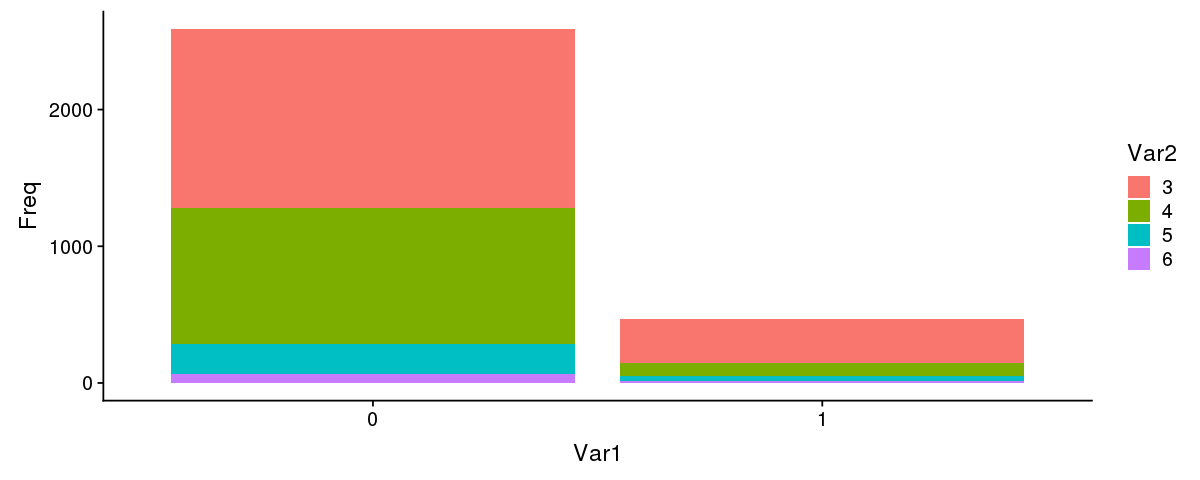

In [163]:
options(repr.plot.width = 10, repr.plot.height = 4)

data = as.data.frame(table(integrated.C1@meta.data$RNA_snn_res.0.05, integrated.C1@meta.data$study))
ggplot(data, aes(fill=Var2, y=Freq, x=Var1)) + geom_bar(position="stack", stat="identity")

data = as.data.frame(table(integrated.C1@meta.data$RNA_snn_res.0.05, integrated.C1@meta.data$Assigned_cluster))
ggplot(data, aes(fill=Var2, y=Freq, x=Var1)) + geom_bar(position="stack", stat="identity")

data = as.data.frame(table(integrated.C1@meta.data$RNA_snn_res.0.05, integrated.C1@meta.data$Stage))
ggplot(data, aes(fill=Var2, y=Freq, x=Var1)) + geom_bar(position="stack", stat="identity")

### Conclusion:
Cluster 1 are replicating cells

In [164]:
save(integrated.C1, file = paste(out, "obj.integrated.frazer.melton_cluster1_seurat_obj", sep = ""))

## Cluster 4

In [686]:
integrated.C4 =  subset(integrated, idents = 4)
integrated.C4 <- FindNeighbors(integrated.C4, dims = 1:15)
integrated.C4 <- FindClusters(integrated.C4, resolution = 0.05)
integrated.C4 <- RunUMAP(integrated.C4, dims = 1:15, min.dist = 0.001)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3599
Number of edges: 127982

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9573
Number of communities: 3
Elapsed time: 0 seconds


13:44:43 Read 3599 rows and found 15 numeric columns
13:44:43 Using Annoy for neighbor search, n_neighbors = 30
13:44:43 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
13:44:44 Writing NN index file to temp file /tmp/5934142.1.juphigh.q/Rtmpd00juW/file21745f46e65
13:44:44 Searching Annoy index using 1 thread, search_k = 3000
13:44:46 Annoy recall = 100%
13:44:47 Commencing smooth kNN distance calibration using 1 thread
13:44:48 Initializing from normalized Laplacian + noise
13:44:48 Commencing optimization for 500 epochs, with 153040 positive edges
13:45:01 Optimization finished


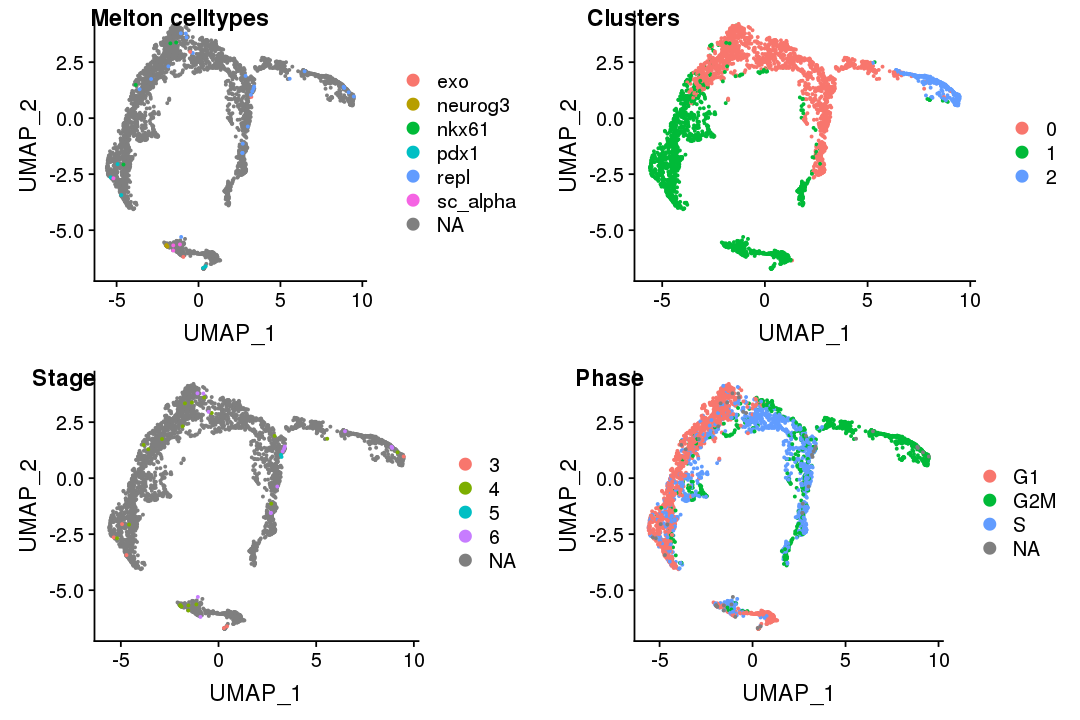

In [722]:
options(repr.plot.width = 9, repr.plot.height = 6)
p1 <- DimPlot(integrated.C4, group.by = "Assigned_cluster", reduction = "umap", ncol = 2)
p2 <- DimPlot(integrated.C4, reduction = "umap")
p3 <- DimPlot(integrated.C4, group.by = "Stage", reduction = "umap", ncol = 2)
p4 <- DimPlot(integrated.C4, group.by = "Phase", reduction = "umap", ncol = 2)
plot_grid(p1, p2, p3, p4, labels=c('Melton celltypes', 'Clusters', 'Stage', "Phase"))

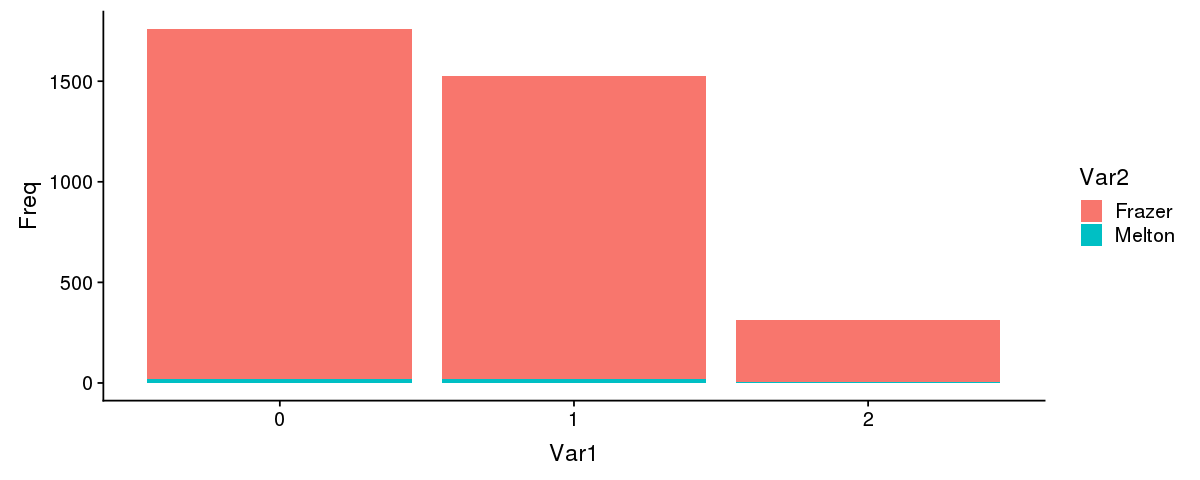

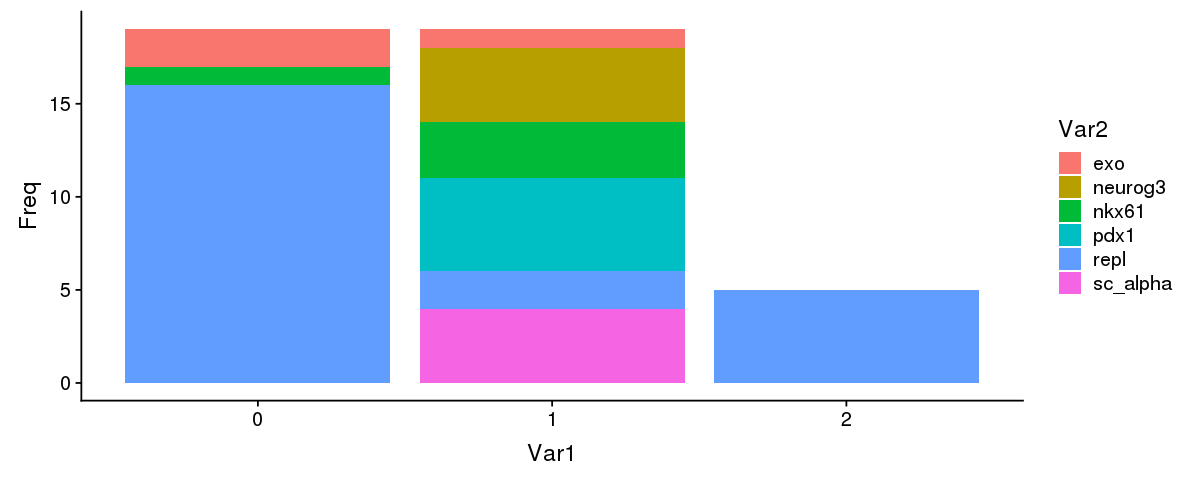

In [689]:
options(repr.plot.width = 10, repr.plot.height = 4)

data = as.data.frame(table(integrated.C4@meta.data$RNA_snn_res.0.05, integrated.C4@meta.data$study))
ggplot(data, aes(fill=Var2, y=Freq, x=Var1)) + geom_bar(position="stack", stat="identity")

data = as.data.frame(table(integrated.C4@meta.data$RNA_snn_res.0.05, integrated.C4@meta.data$Assigned_cluster))
ggplot(data, aes(fill=Var2, y=Freq, x=Var1)) + geom_bar(position="stack", stat="identity")


### observations
None of the clusters are represented by Melton cell types. Clusters are driven by phase.

In [697]:
integrated.C4_0_markers <- FindMarkers(integrated.C4, ident.1 = 0, ident.2 = NULL, min.diff.pct = 0.25)

In [698]:
head(integrated.C4_0_markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLC2A3,9.335032e-112,0.7811191,0.801,0.467,5.447738e-107
SFN,3.809418e-72,0.4841087,0.423,0.142,2.223100e-67
GATA3,2.902213e-63,4.0523130,0.496,0.205,1.693673e-58
SLC1A6,4.387765e-62,0.3903653,0.387,0.131,2.560612e-57
SLC2A1,9.608406e-61,0.3897578,0.622,0.323,5.607274e-56
CLDN6,2.358081e-60,1.8726583,0.808,0.484,1.376129e-55


In [699]:
integrated.C4_1_markers <- FindMarkers(integrated.C4, ident.1 = 1, ident.2 = NULL, min.diff.pct = 0.25)

In [700]:
head(integrated.C4_1_markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMGB2,1.376804e-111,-1.9303091,0.314,0.712,8.034755e-107
TOP2A,1.458317e-107,-1.0350222,0.151,0.510,8.510448e-103
CDK1,2.353280e-106,-0.6866866,0.084,0.426,1.373327e-101
CKS1B,3.700713e-105,-4.6482249,0.305,0.701,2.159662e-100
UBE2C,6.517215e-103,-0.9878953,0.132,0.476,3.803317e-98
NUSAP1,1.867445e-101,-0.7253130,0.081,0.408,1.089803e-96


In [701]:
integrated.C4_2_markers <- FindMarkers(integrated.C4, ident.1 = 2, ident.2 = NULL, min.diff.pct = 0.25)

In [702]:
head(integrated.C4_2_markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PLK1,8.708205e-270,1.635687,0.831,0.106,5.081934e-265
CENPA,2.518803e-240,1.040373,0.732,0.082,1.469923e-235
CDC20,3.628950e-239,1.459851,0.908,0.161,2.117783e-234
DLGAP5,1.830769e-228,1.152072,0.818,0.125,1.068400e-223
HMMR,1.188214e-227,1.146854,0.828,0.130,6.934178e-223
CCNB1,4.318128e-221,3.029729,0.978,0.271,2.519973e-216


### observations
None of the subclusters are obviously any cell type, but as phase is driving difference, they are all likely pretty similar.

In [721]:
head(integrated_4_markers, 15)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
COL3A1,0,35.585060,0.268,0.008,0
ANXA1,0,23.001336,0.543,0.046,0
ARHGAP29,0,8.728584,0.558,0.193,0
COL1A1,0,8.310855,0.517,0.190,0
CRABP2,0,7.604973,0.867,0.316,0
NR2F2,0,5.948574,0.708,0.320,0
BMP4,0,5.738086,0.312,0.043,0
CDK6,0,4.201830,0.432,0.135,0
GATA3,0,3.776267,0.347,0.022,0


### Conclusions:
I have no idea what this cell type is.

In [725]:
integrated_metaorig = integrated@meta.data

# My annotations

In [149]:
integrated_annotations = integrated@meta.data

In [150]:
integrated_annotations$major_cell_population = integrated_annotations$Assigned_cluster
integrated_annotations$minor_cell_population = integrated_annotations$Assigned_cluster

In [766]:
## C0 - by melton-directed annotation

# integrated.C0_anns_frazer = integrated.C0_anns[ is.na(integrated.C0_anns$Assigned_cluster), ]

# integrated_annotations[ integrated_annotations$integrated_snn_res.0.05 == 0 &
#                         (is.na(integrated_annotations$Assigned_cluster)),  ]$major_cell_population = "MISSING"

# integrated_annotations[, "major_cell_population"] = 
#             integrated.C0_anns_frazer[match(rownames(integrated_annotations), rownames(integrated.C0_anns_frazer)), "major_cell_population"]

# integrated_annotations[, "minor_cell_population"] = 
#             integrated.C0_anns_frazer[match(rownames(integrated_annotations), rownames(integrated.C0_anns_frazer)), "minor_cell_population"]

In [151]:
## C0 - by binned pseudotime

integrated_annotations[, "major_cell_population"] = 
            pseudotime_ppc[match(rownames(integrated_annotations), rownames(pseudotime_ppc)), "quants"]

integrated_annotations[, "minor_cell_population"] = 
            pseudotime_ppc[match(rownames(integrated_annotations), rownames(pseudotime_ppc)), "quants"]

In [152]:
table(integrated_annotations$major_cell_population)


PPC_1 PPC_2 PPC_3 PPC_4 
18576 18575 18576 18576 

In [153]:
integrated_annotations[! is.na(integrated_annotations$Assigned_cluster),]$major_cell_population = integrated_annotations[! is.na(integrated_annotations$Assigned_cluster),]$Assigned_cluster
integrated_annotations[! is.na(integrated_annotations$Assigned_cluster),]$minor_cell_population = integrated_annotations[! is.na(integrated_annotations$Assigned_cluster),]$Assigned_cluster

In [154]:
integrated_annotations[ integrated_annotations$integrated_snn_res.0.05 == 3 &
                        (is.na(integrated_annotations$Assigned_cluster)),  ]$major_cell_population = "iPSC"

In [155]:
integrated_annotations[ integrated_annotations$integrated_snn_res.0.05 == 2 &
                        (is.na(integrated_annotations$Assigned_cluster)),  ]$major_cell_population = "Endocrine"

integrated_annotations[ integrated_annotations$integrated_snn_res.0.05 == 2 &
                        (is.na(integrated_annotations$Assigned_cluster)),  ]$minor_cell_population = "sc_alpha"

In [156]:
integrated_annotations[ integrated_annotations$integrated_snn_res.0.05 == 5 &
                        (is.na(integrated_annotations$Assigned_cluster)),  ]$major_cell_population = "endothelial"

In [157]:
integrated_annotations[ integrated_annotations$integrated_snn_res.0.05 == 1 &
                        (is.na(integrated_annotations$Assigned_cluster)),  ]$major_cell_population = "repl"

In [158]:
integrated_annotations[ integrated_annotations$integrated_snn_res.0.05 == 4 &
                        (is.na(integrated_annotations$Assigned_cluster)),  ]$major_cell_population = "mesenchymal"

In [159]:
integrated@meta.data = integrated_annotations

In [160]:
table(integrated_annotations$major_cell_population, integrated_annotations$study)

                  
                   Frazer Melton
  Endocrine           794      0
  endothelial         349      0
  exo                   0   1753
  fev_high_isl_neg      0    352
  foxj1                 0    587
  iPSC               8273      0
  mesenchymal        3556      0
  neurog3               0    388
  nkx61                 0   3507
  pdx1                  0   5955
  PPC_1             13880      0
  PPC_2             17096      0
  PPC_3             14697      0
  PPC_4             17139      0
  repl              12404   4116
  sc_alpha              0   4684
  sc_beta               0   1309
  sc_ec                 0   1443
  sst_hhex              0    227

In [1049]:
write.table(integrated_annotations, file = paste(out, "integrated_annotations.txt", sep = ""))

In [1030]:
# cols = data.frame(celltype = (unique(integrated@meta.data$major_cell_population)), col = c("#5ebd53", "#d49100", "#827f80", "#c9c230", "#d984c6", "#ede99a", "#a39000", "#56ccd8", "#9c0031", "#b2e18c", "#67c2a5",
#                                                                                   "#e5191b", "#c3826c", "#ff7f00", "#f69c9c", "#4bb047", "#984ea4", "#387cb7", "#a6cee3"))

# cols

In [161]:
cols = data.frame(celltype = sort(unique(integrated@meta.data$major_cell_population)), col = c("#56ccd8", "#9c0031", "#4bb047", "#c3826c", "#a6cee3", "#5ebd53", "#d984c6", "#ff7f00", "#67c2a5", "#b2e18c",
                                                                                               "#ede99a", "#d49100", "#c9c230", "#a39000", "#827f80", "#e5191b", "#984ea4", "#387cb7", "#f69c9c"))

cols

celltype,col
<chr>,<chr>
Endocrine,#56ccd8
endothelial,#9c0031
exo,#4bb047
fev_high_isl_neg,#c3826c
foxj1,#a6cee3
iPSC,#5ebd53
mesenchymal,#d984c6
neurog3,#ff7f00
nkx61,#67c2a5


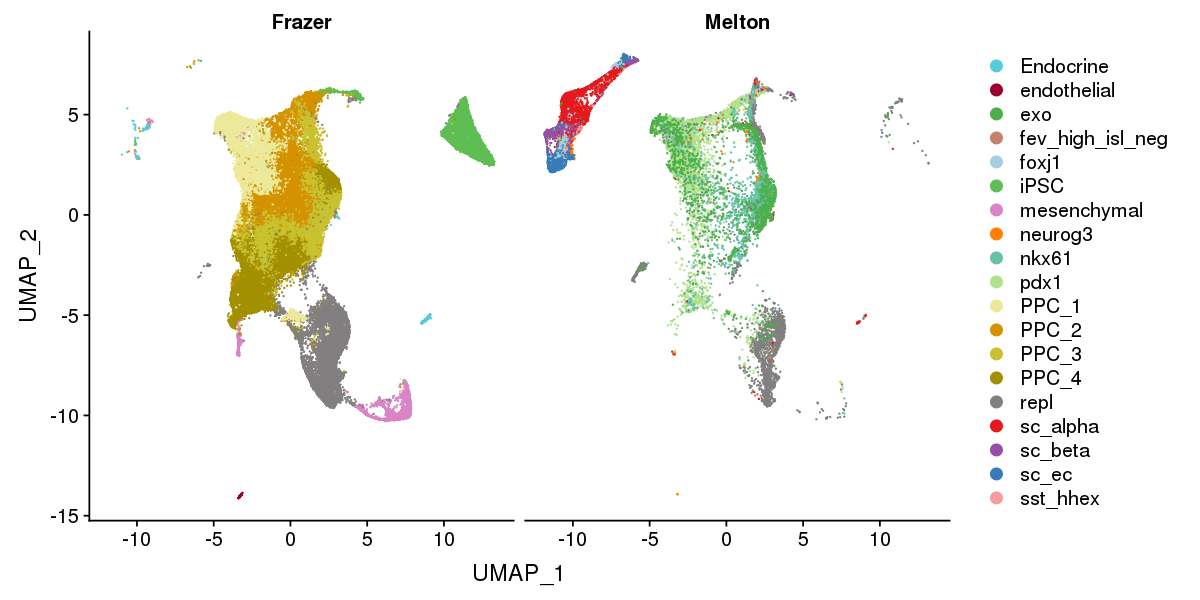

In [162]:
options(repr.plot.width = 10, repr.plot.height = 5)
DimPlot(integrated, group.by = "major_cell_population", split.by = "study", label = F, cols = cols$col)


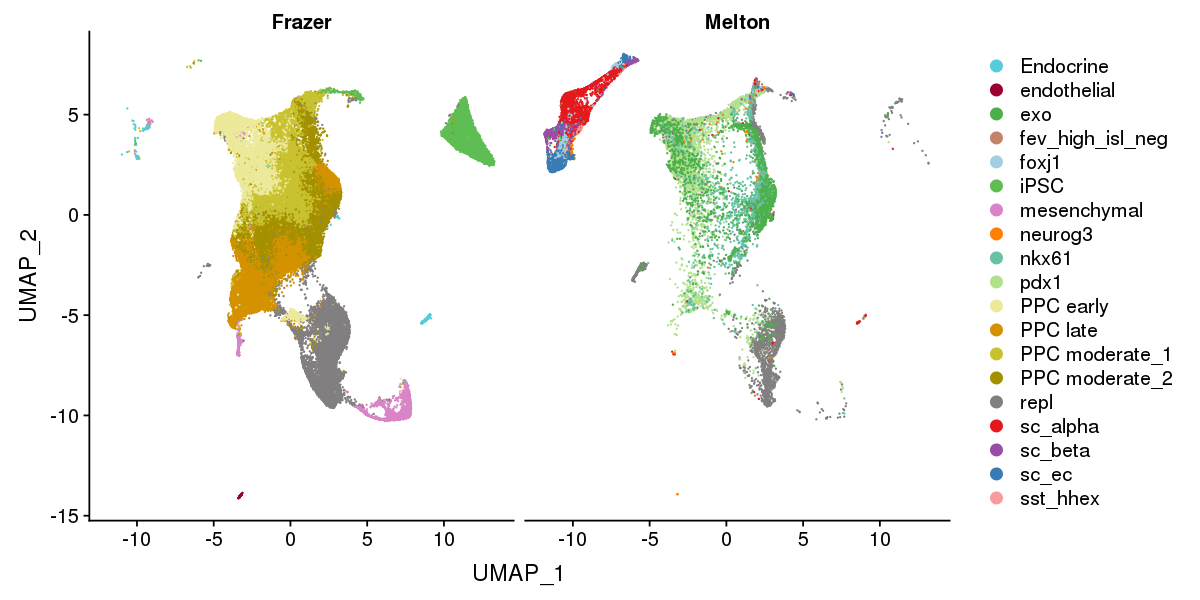

In [1051]:
options(repr.plot.width = 10, repr.plot.height = 5)
DimPlot(integrated, group.by = "major_cell_population", split.by = "study", label = F, cols = cols$col)


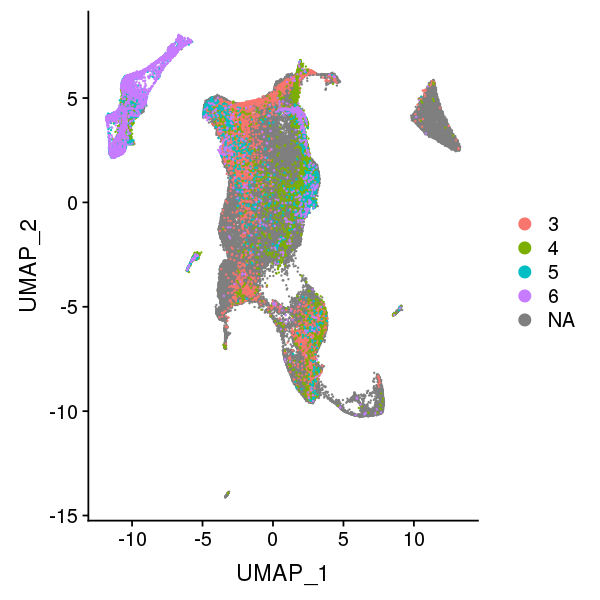

In [1025]:
options(repr.plot.width = 5, repr.plot.height = 5)
DimPlot(integrated, group.by = "Stage", label = F)